## DLL

## Домашняя работа 2  |  Многослойные нейронные сети

## Иванов Денис

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import time

In [ ]:
BATCH_SIZE = 64

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.], [0.5])])

train_dataset    = datasets.FashionMNIST('.', download = True, train = True, 
                                         transform = transform)
test_dataset     = datasets.FashionMNIST('.', download = True, train = False, 
                                         transform = transform)

train = torch.utils.data.DataLoader(train_dataset, 
                                    batch_size = BATCH_SIZE, shuffle = True)
test  = torch.utils.data.DataLoader(test_dataset,  
                                    batch_size = BATCH_SIZE, shuffle = False)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


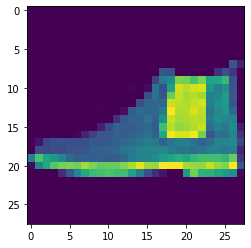

In [ ]:
plt.imshow(train_dataset[111][0].numpy().reshape(28,28))

In [ ]:
def nn_proba(model):
    for ep in range(num_epochs):
        train_iters, train_passed  = 0, 0
        train_loss, train_acc = 0., 0.
        start=time.time()
    
        model.train()
        for X, y in train:
            trainer.zero_grad()
            y_pred = model(X)
            l = loss(y_pred, y)
            l.backward()
            trainer.step()
            train_loss += l.item()
            train_acc += (y_pred.argmax(dim=1) == y).sum().item()
            train_iters += 1
            train_passed += len(X)
    
        test_iters, test_passed  = 0, 0
        test_loss, test_acc = 0., 0.
        model.eval()
        for X, y in test:
            y_pred = model(X)
            l = loss(y_pred, y)
            test_loss += l.item()
            test_acc += (y_pred.argmax(dim=1) == y).sum().item()
            test_iters += 1
            test_passed += len(X)
        
        print("ep: {}, taked: {:.3f}, train_loss: {:.3f}, train_acc: {:.3f}, test_loss: {:.3f}, test_acc: {:.3f}".format(
        ep, time.time() - start, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
        )

#### Решение № 1

In [ ]:
m_61 = nn.Sequential(nn.Flatten(),
                      nn.BatchNorm1d(784),
                      nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Dropout(0.25),
                      nn.BatchNorm1d(128),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.BatchNorm1d(64),
                      nn.Linear(64, 10), 
                     )

loss    = nn.CrossEntropyLoss()
trainer = optim.Adam(m_61.parameters(), lr=0.004)
num_epochs  = 15
BATCH_SIZE  = 128
nn_proba(m_61)

ep: 0, taked: 17.608, train_loss: 0.500, train_acc: 0.818, test_loss: 0.401, test_acc: 0.851
ep: 1, taked: 17.121, train_loss: 0.402, train_acc: 0.852, test_loss: 0.374, test_acc: 0.865
ep: 2, taked: 17.203, train_loss: 0.370, train_acc: 0.865, test_loss: 0.357, test_acc: 0.870
ep: 3, taked: 17.126, train_loss: 0.351, train_acc: 0.870, test_loss: 0.374, test_acc: 0.876
ep: 4, taked: 16.815, train_loss: 0.340, train_acc: 0.875, test_loss: 0.337, test_acc: 0.877
ep: 5, taked: 16.953, train_loss: 0.328, train_acc: 0.878, test_loss: 0.338, test_acc: 0.878
ep: 6, taked: 16.692, train_loss: 0.320, train_acc: 0.882, test_loss: 0.423, test_acc: 0.875
ep: 7, taked: 17.194, train_loss: 0.312, train_acc: 0.883, test_loss: 0.333, test_acc: 0.881
ep: 8, taked: 17.073, train_loss: 0.298, train_acc: 0.889, test_loss: 0.335, test_acc: 0.885
ep: 9, taked: 16.839, train_loss: 0.296, train_acc: 0.889, test_loss: 0.334, test_acc: 0.883
ep: 10, taked: 16.936, train_loss: 0.287, train_acc: 0.893, test_loss:

#### Решение № 2

In [ ]:
m_71 = nn.Sequential(nn.Flatten(),
                      nn.BatchNorm1d(784),
                      nn.Linear(784, 256),
                      nn.ReLU(),                      
                      nn.BatchNorm1d(256),
                      nn.Dropout(0.5),
                      nn.Linear(256, 64),
                      nn.ReLU(),                      
                      nn.BatchNorm1d(64),
                      nn.Linear(64, 10)
                     )
loss    = nn.CrossEntropyLoss()
trainer = optim.Adam(m_71.parameters(), lr=0.01)
num_epochs  = 20
BATCH_SIZE  = 128
nn_proba(m_71)

ep: 0, taked: 17.634, train_loss: 0.521, train_acc: 0.810, test_loss: 0.411, test_acc: 0.851
ep: 1, taked: 17.702, train_loss: 0.426, train_acc: 0.845, test_loss: 0.381, test_acc: 0.862
ep: 2, taked: 17.783, train_loss: 0.401, train_acc: 0.854, test_loss: 0.376, test_acc: 0.863
ep: 3, taked: 17.736, train_loss: 0.380, train_acc: 0.860, test_loss: 0.359, test_acc: 0.865
ep: 4, taked: 17.724, train_loss: 0.373, train_acc: 0.862, test_loss: 0.357, test_acc: 0.870
ep: 5, taked: 17.698, train_loss: 0.360, train_acc: 0.869, test_loss: 0.350, test_acc: 0.866
ep: 6, taked: 17.613, train_loss: 0.353, train_acc: 0.870, test_loss: 0.360, test_acc: 0.866
ep: 7, taked: 17.558, train_loss: 0.347, train_acc: 0.872, test_loss: 0.355, test_acc: 0.869
ep: 8, taked: 17.589, train_loss: 0.333, train_acc: 0.877, test_loss: 0.339, test_acc: 0.876
ep: 9, taked: 17.443, train_loss: 0.331, train_acc: 0.877, test_loss: 0.339, test_acc: 0.878
ep: 10, taked: 17.341, train_loss: 0.327, train_acc: 0.876, test_loss:

#### Решение № 3

In [ ]:
m_12 = nn.Sequential(nn.Flatten(),
                      nn.BatchNorm1d(784),
                      nn.Linear(784, 512),
                      nn.ReLU(),                      
                      nn.Dropout(0.5),
                      nn.BatchNorm1d(512),
                      nn.Linear(512, 512),
                      nn.ReLU(),                      
                      nn.Dropout(0.3),
                      nn.BatchNorm1d(512),                      
                      nn.Linear(512, 10)
                     )
loss    = nn.CrossEntropyLoss()
trainer = optim.SGD(m_12.parameters(), lr=0.01)
num_epochs  = 20
BATCH_SIZE  = 128
nn_proba(m_12)

ep: 0, taked: 24.203, train_loss: 0.668, train_acc: 0.769, test_loss: 0.463, test_acc: 0.835
ep: 1, taked: 24.074, train_loss: 0.481, train_acc: 0.828, test_loss: 0.458, test_acc: 0.848
ep: 2, taked: 24.161, train_loss: 0.445, train_acc: 0.840, test_loss: 0.420, test_acc: 0.852
ep: 3, taked: 24.114, train_loss: 0.420, train_acc: 0.849, test_loss: 0.405, test_acc: 0.862
ep: 4, taked: 24.127, train_loss: 0.406, train_acc: 0.853, test_loss: 0.413, test_acc: 0.862
ep: 5, taked: 24.308, train_loss: 0.390, train_acc: 0.859, test_loss: 0.394, test_acc: 0.864
ep: 6, taked: 24.129, train_loss: 0.377, train_acc: 0.863, test_loss: 0.385, test_acc: 0.868
ep: 7, taked: 24.138, train_loss: 0.367, train_acc: 0.867, test_loss: 0.388, test_acc: 0.871
ep: 8, taked: 24.080, train_loss: 0.356, train_acc: 0.872, test_loss: 0.381, test_acc: 0.872
ep: 9, taked: 23.849, train_loss: 0.353, train_acc: 0.871, test_loss: 0.351, test_acc: 0.875
ep: 10, taked: 24.004, train_loss: 0.343, train_acc: 0.875, test_loss: